In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("pizza_sales.csv")

data.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


In [4]:
data.isna().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [5]:
data.shape

(48620, 12)

In [6]:
data.nunique()

pizza_id             48620
order_id             21350
pizza_name_id           91
quantity                 4
order_date             358
order_time           16382
unit_price              25
total_price             56
pizza_size               5
pizza_category           4
pizza_ingredients       32
pizza_name              32
dtype: int64

In [7]:
data.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Category Percentage')

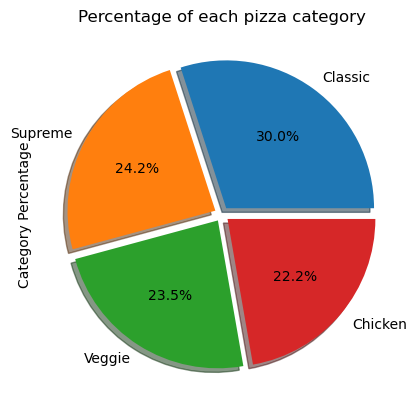

In [9]:
data['pizza_category'].value_counts().plot(kind='pie', autopct="%0.1f%%", explode=[0.05, 0.05, 0.05 ,0.05], shadow=True)
plt.title('Percentage of each pizza category')
plt.ylabel('Category Percentage')

Text(0, 0.5, 'Count')

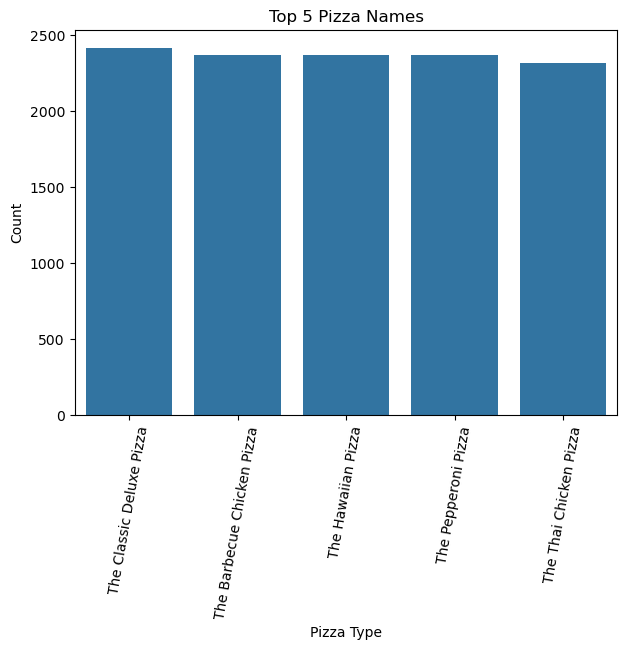

In [10]:
Top_5_types = data['pizza_name'].value_counts().head(5).index.tolist()

plt.figure(figsize=(7, 5))
sns.countplot(data=data, x='pizza_name', order=Top_5_types)
plt.xticks(rotation=80)
plt.title('Top 5 Pizza Names')
plt.xlabel('Pizza Type')
plt.ylabel('Count')

Text(0, 0.5, 'pizza counts')

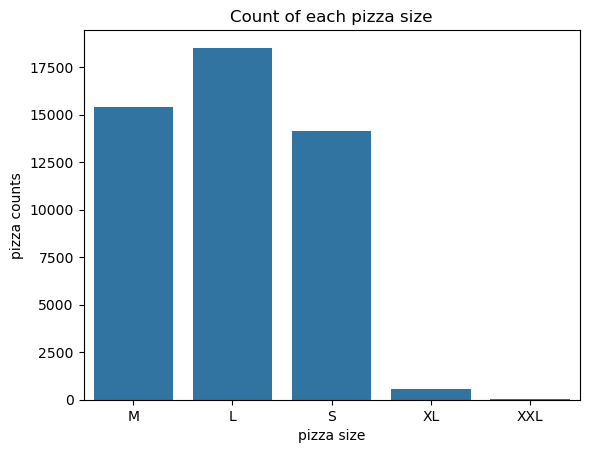

In [11]:
sns.countplot(data =data , x= 'pizza_size')
plt.title('Count of each pizza size')
plt.xlabel('pizza size')
plt.ylabel('pizza counts')

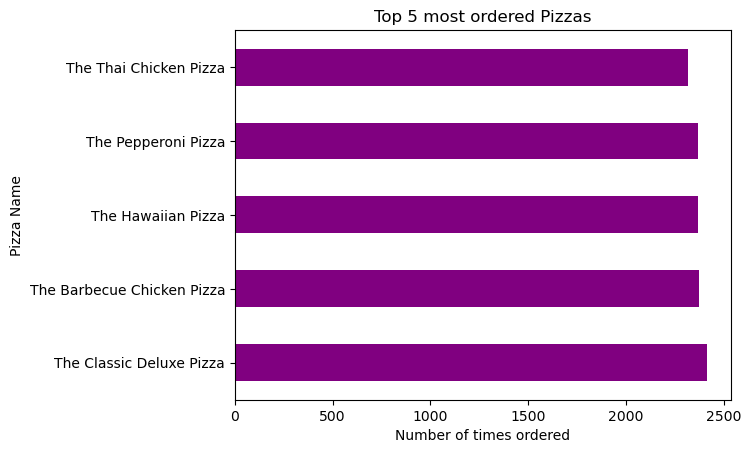

In [12]:
data.groupby('pizza_name')['order_id']\
  .agg(['count'])\
  .sort_values('count',ascending=False)['count']\
  .head(5)\
  .plot(kind='barh',title="Top 5 most ordered Pizzas",color='purple')
plt.xlabel('Number of times ordered')
plt.ylabel('Pizza Name')
plt.show()

In [13]:
data_copy = data.copy()

In [14]:
df = data_copy.drop(['order_date', 'order_time', 'pizza_ingredients', 'pizza_name', 'pizza_name_id'], axis=1)
df.head(2)

,pizza_id,order_id,quantity,unit_price,total_price,pizza_size,pizza_category
0,1.0,1.0,1.0,13.25,13.25,M,Classic
1,2.0,2.0,1.0,16.00,16.00,M,Classic


In [15]:
data_encoded = pd.get_dummies(df, columns=['pizza_size', 'pizza_category'])

In [16]:
data_encoded = data_encoded.astype(int)
data_encoded.dtypes

pizza_id                  int32
order_id                  int32
quantity                  int32
unit_price                int32
total_price               int32
pizza_size_L              int32
pizza_size_M              int32
pizza_size_S              int32
pizza_size_XL             int32
pizza_size_XXL            int32
pizza_category_Chicken    int32
pizza_category_Classic    int32
pizza_category_Supreme    int32
pizza_category_Veggie     int32
dtype: object

In [17]:
data_encoded.head()

,pizza_id,order_id,quantity,unit_price,total_price,pizza_size_L,pizza_size_M,pizza_size_S,pizza_size_XL,pizza_size_XXL,pizza_category_Chicken,pizza_category_Classic,pizza_category_Supreme,pizza_category_Veggie
0,1,1,1,13,13,0,1,0,0,0,0,1,0,0
1,2,2,1,16,16,0,1,0,0,0,0,1,0,0
2,3,2,1,18,18,1,0,0,0,0,0,0,0,1
3,4,2,1,20,20,1,0,0,0,0,0,0,1,0
4,5,2,1,16,16,0,1,0,0,0,0,0,0,1


In [18]:
data.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['pizza_category'] = label_encoder.fit_transform(df['pizza_category'])

print(df)

       pizza_id  order_id  quantity  unit_price  total_price pizza_size  \
0           1.0       1.0       1.0       13.25        13.25          M   
1           2.0       2.0       1.0       16.00        16.00          M   
2           3.0       2.0       1.0       18.50        18.50          L   
3           4.0       2.0       1.0       20.75        20.75          L   
4           5.0       2.0       1.0       16.00        16.00          M   
...         ...       ...       ...         ...          ...        ...   
48615   48616.0   21348.0       1.0       16.75        16.75          M   
48616   48617.0   21348.0       1.0       17.95        17.95          L   
48617   48618.0   21348.0       1.0       12.00        12.00          S   
48618   48619.0   21349.0       1.0       20.25        20.25          L   
48619   48620.0   21350.0       1.0       12.75        12.75          S   

       pizza_category  
0                   1  
1                   1  
2                   3  
3  

In [20]:
X = df.drop(['pizza_category', 'pizza_size'], axis=1)
y = df['pizza_category']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_logistic = LogisticRegression(random_state=42)

model_logistic.fit(X_train_scaled, y_train)

y_pred_logistic = model_logistic.predict(X_test_scaled)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy with Logistic Regression: {accuracy_logistic}")

Accuracy with Logistic Regression: 0.34152612093788565


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, f1_score

X = df.drop(['pizza_category', 'pizza_size'], axis=1)
y = df['pizza_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели случайного леса
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Предсказание
y_pred_rf = model_rf.predict(X_test)

# Оценка модели
print(classification_report(y_test, y_pred_rf))
f1 = f1_score(y_test, y_pred_rf, average='weighted')
print(f"F1 Score: {f1}")

# Тюнинг гиперпараметров
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

              precision    recall  f1-score   support

           0       0.73      0.72      0.72      2155
           1       0.75      0.74      0.74      2935
           2       0.62      0.64      0.63      2357
           3       0.59      0.59      0.59      2277

    accuracy                           0.67      9724
   macro avg       0.67      0.67      0.67      9724
weighted avg       0.67      0.67      0.67      9724

F1 Score: 0.6745878165422442
Best parameters: {'max_depth': 10, 'n_estimators': 50}


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


model_rf = RandomForestClassifier(random_state=42)

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy with Random Forest Classifier: {accuracy_rf}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy with Random Forest Classifier: 0.6743109831345125
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.72      2155
           1       0.75      0.74      0.74      2935
           2       0.62      0.64      0.63      2357
           3       0.59      0.59      0.59      2277

    accuracy                           0.67      9724
   macro avg       0.67      0.67      0.67      9724
weighted avg       0.67      0.67      0.67      9724



In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Обучение модели градиентного бустинга
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)

# Предсказание
y_pred_gb = model_gb.predict(X_test)

# Оценка модели
print("Accuracy with Gradient Boosting Classifier:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


Accuracy with Gradient Boosting Classifier: 0.7475318798848211
Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82      2155
           1       0.77      0.86      0.81      2935
           2       0.73      0.62      0.67      2357
           3       0.84      0.50      0.62      2277

    accuracy                           0.75      9724
   macro avg       0.76      0.74      0.73      9724
weighted avg       0.76      0.75      0.74      9724



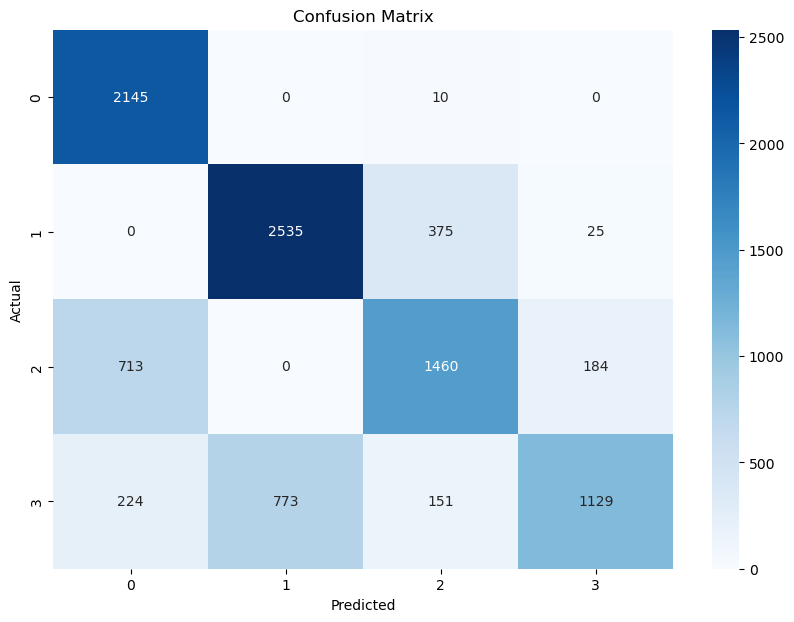

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(len(set(y))), yticklabels=range(len(set(y))))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
from sklearn.model_selection import RandomizedSearchCV

# Создаем объект RandomizedSearchCV
random_search = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=10,  # Количество случайных комбинаций
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Обучение модели
random_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры:", random_search.best_params_)
print("Лучшая точность:", random_search.best_score_)

C:\Users\Farkhod.Jonmakhmadov\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Лучшие параметры: {'n_estimators': 50, 'max_depth': 10}
Лучшая точность: 0.7367080872601768


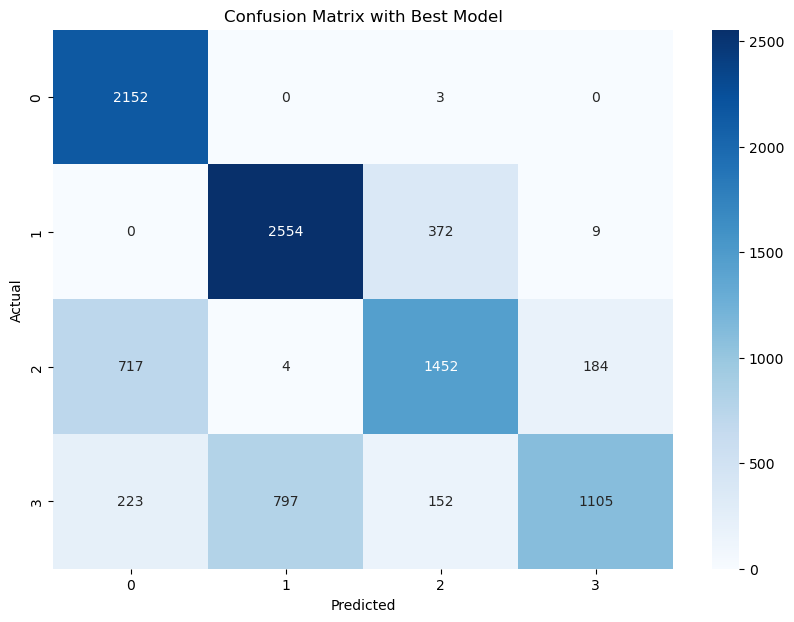

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Используем лучшие параметры для повторного обучения модели
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Построение матрицы ошибок
cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=range(len(set(y))), yticklabels=range(len(set(y))))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Best Model')
plt.show()
